In [ ]:
!nvidia-smi

Wed Dec 23 18:01:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install gdown
!pip install tensorflow
!pip install tensorflow-gpu
!pip install --upgrade tensorflow-gpu==2.1.0 

     |████████████████████████████████| 394.7MB 44kB/s 
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 46.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 3.9MB 37.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=74b76ce8180d4b48a62f4fa1478bab8d01734cb533880454bc47af8afbdcb112
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement tensorboard~=2.4, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement tensorflow-estimator<2.5.0,>=2.4.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import glob 
from google.colab import drive


%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names = ['user_id','x_axis','y_axis','z_axis','song'];

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Dance Data _ Merged Songs _ Latest.xlsx', names=column_names)
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
column_names = ['user_id','x_axis','y_axis','z_axis','song'];

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/datasets.xlsx', sheet_name='dance', names=column_names)
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
column_names = ['user_id','timestamp','x_axis','y_axis','z_axis','abs_acc','song'];

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data.xlsx', sheet_name='dance', names=column_names)
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)


In [ ]:
column_names = ['user_id','timestamp','x_axis','y_axis','z_axis','abs_acc','song']

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/TESTDATASET.xlsx', names=column_names)
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)


In [ ]:
df.head()

,user_id,x_axis,y_axis,z_axis,song
0,1,1.676498,1.556198,9.570175,We Are One
1,1,1.485672,0.736069,8.173523,We Are One
2,1,4.177246,0.848480,11.127731,We Are One
3,1,12.134964,-12.630280,17.479538,We Are One
4,1,-13.989243,-24.938156,-5.588715,We Are One


In [ ]:
df.shape

(5999, 5)

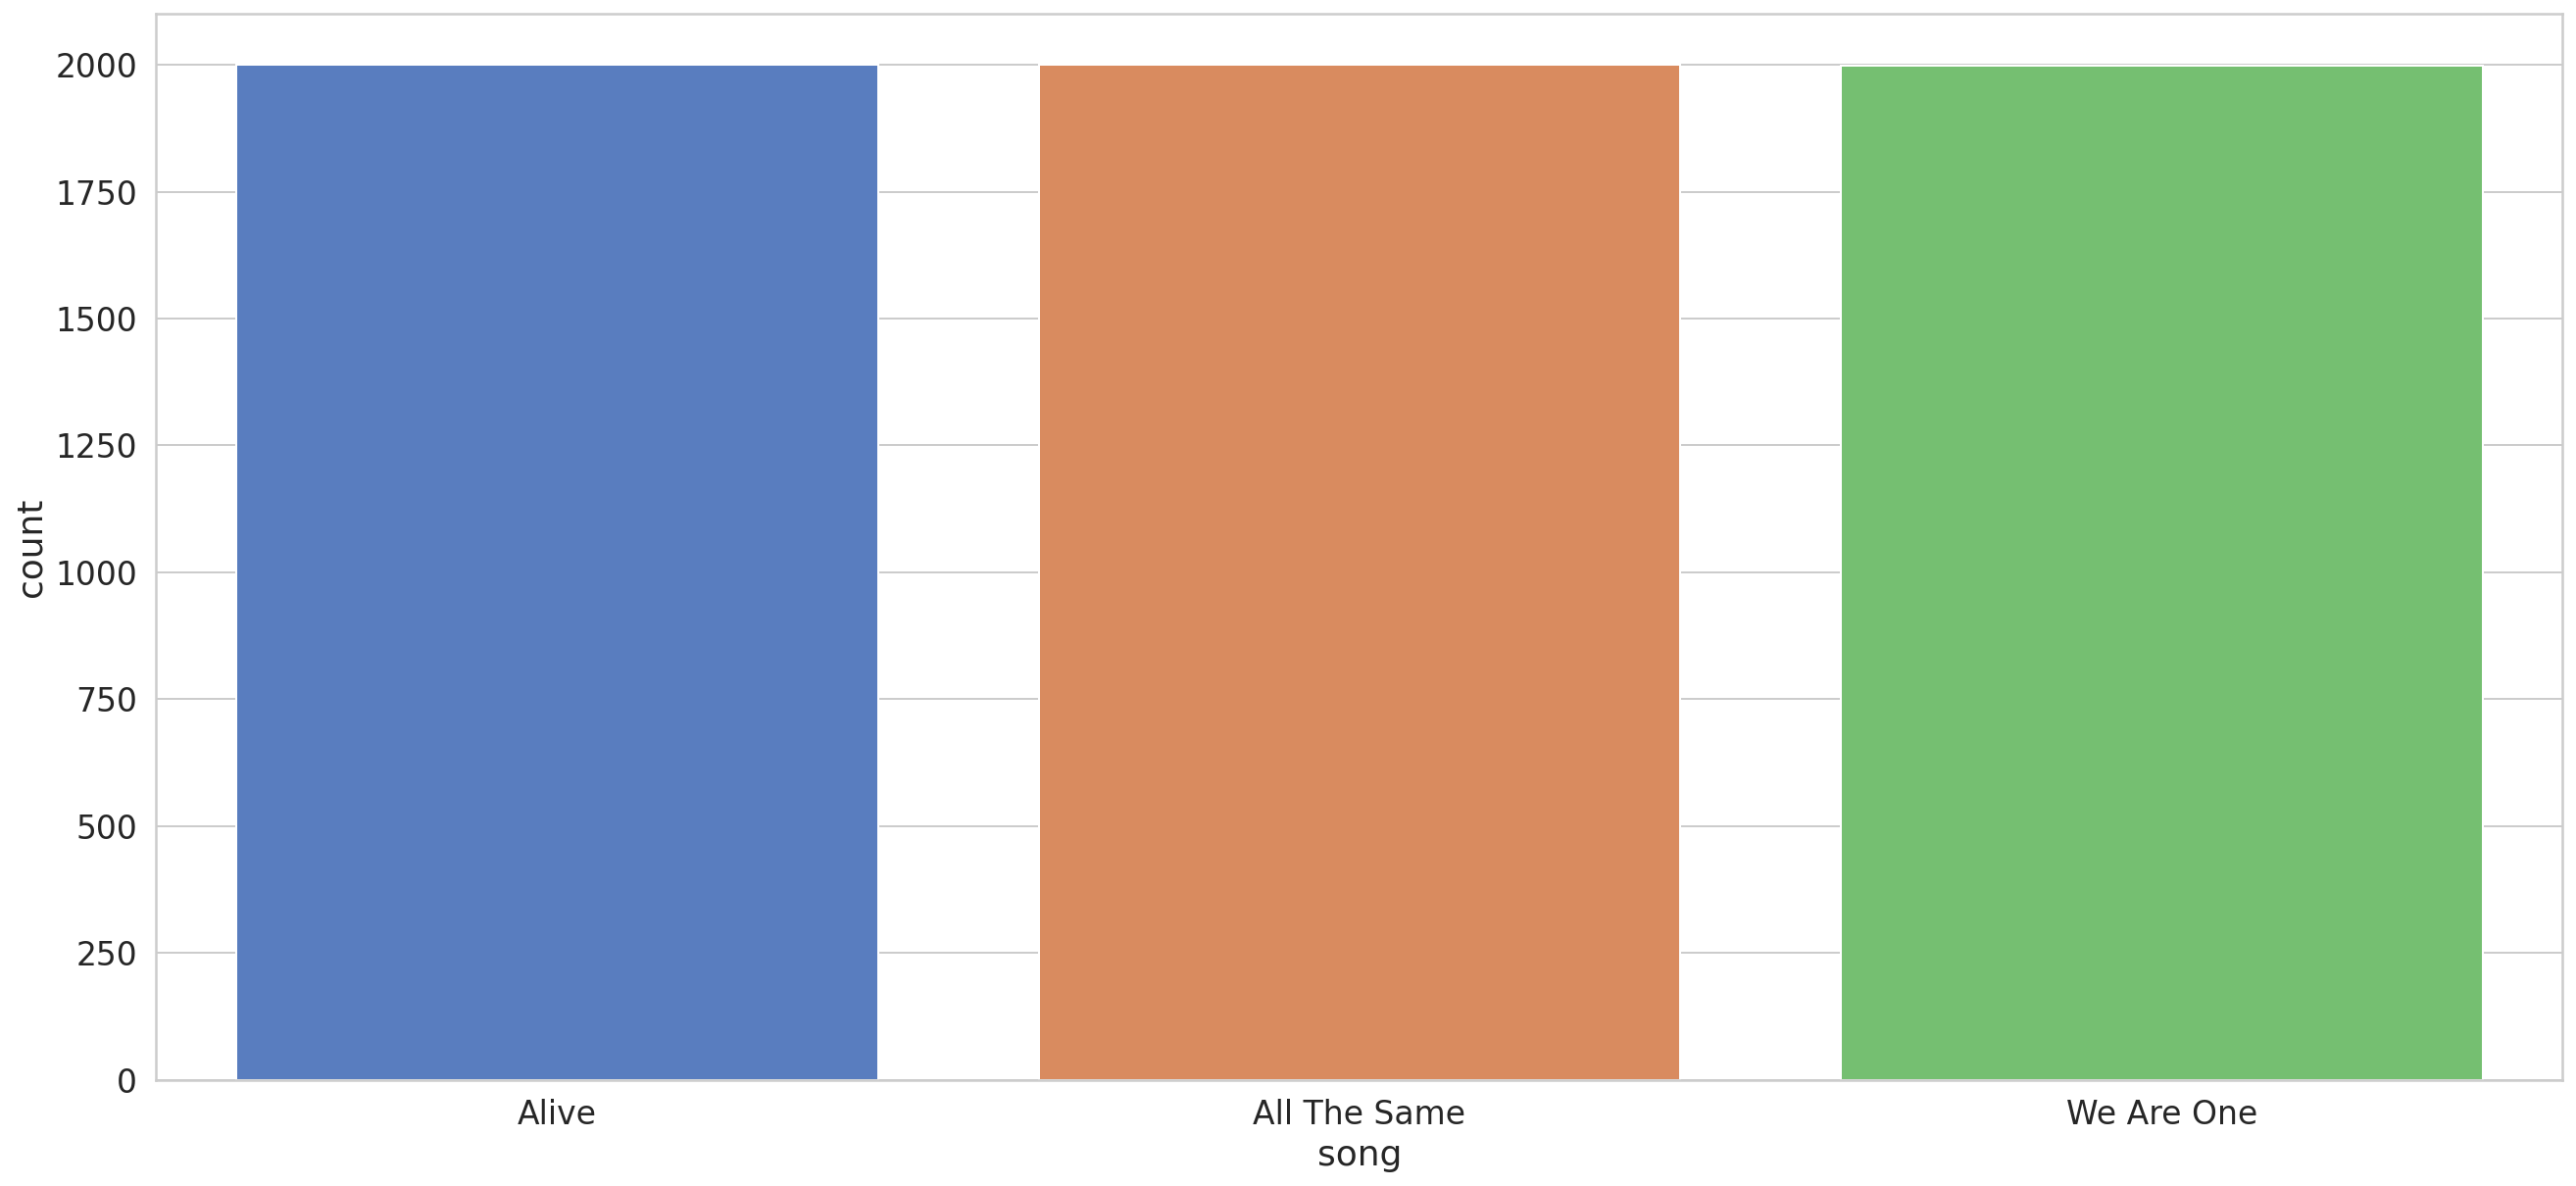

In [ ]:
sns.countplot(x = 'song',
              data = df,
              order = df.song.value_counts().index);

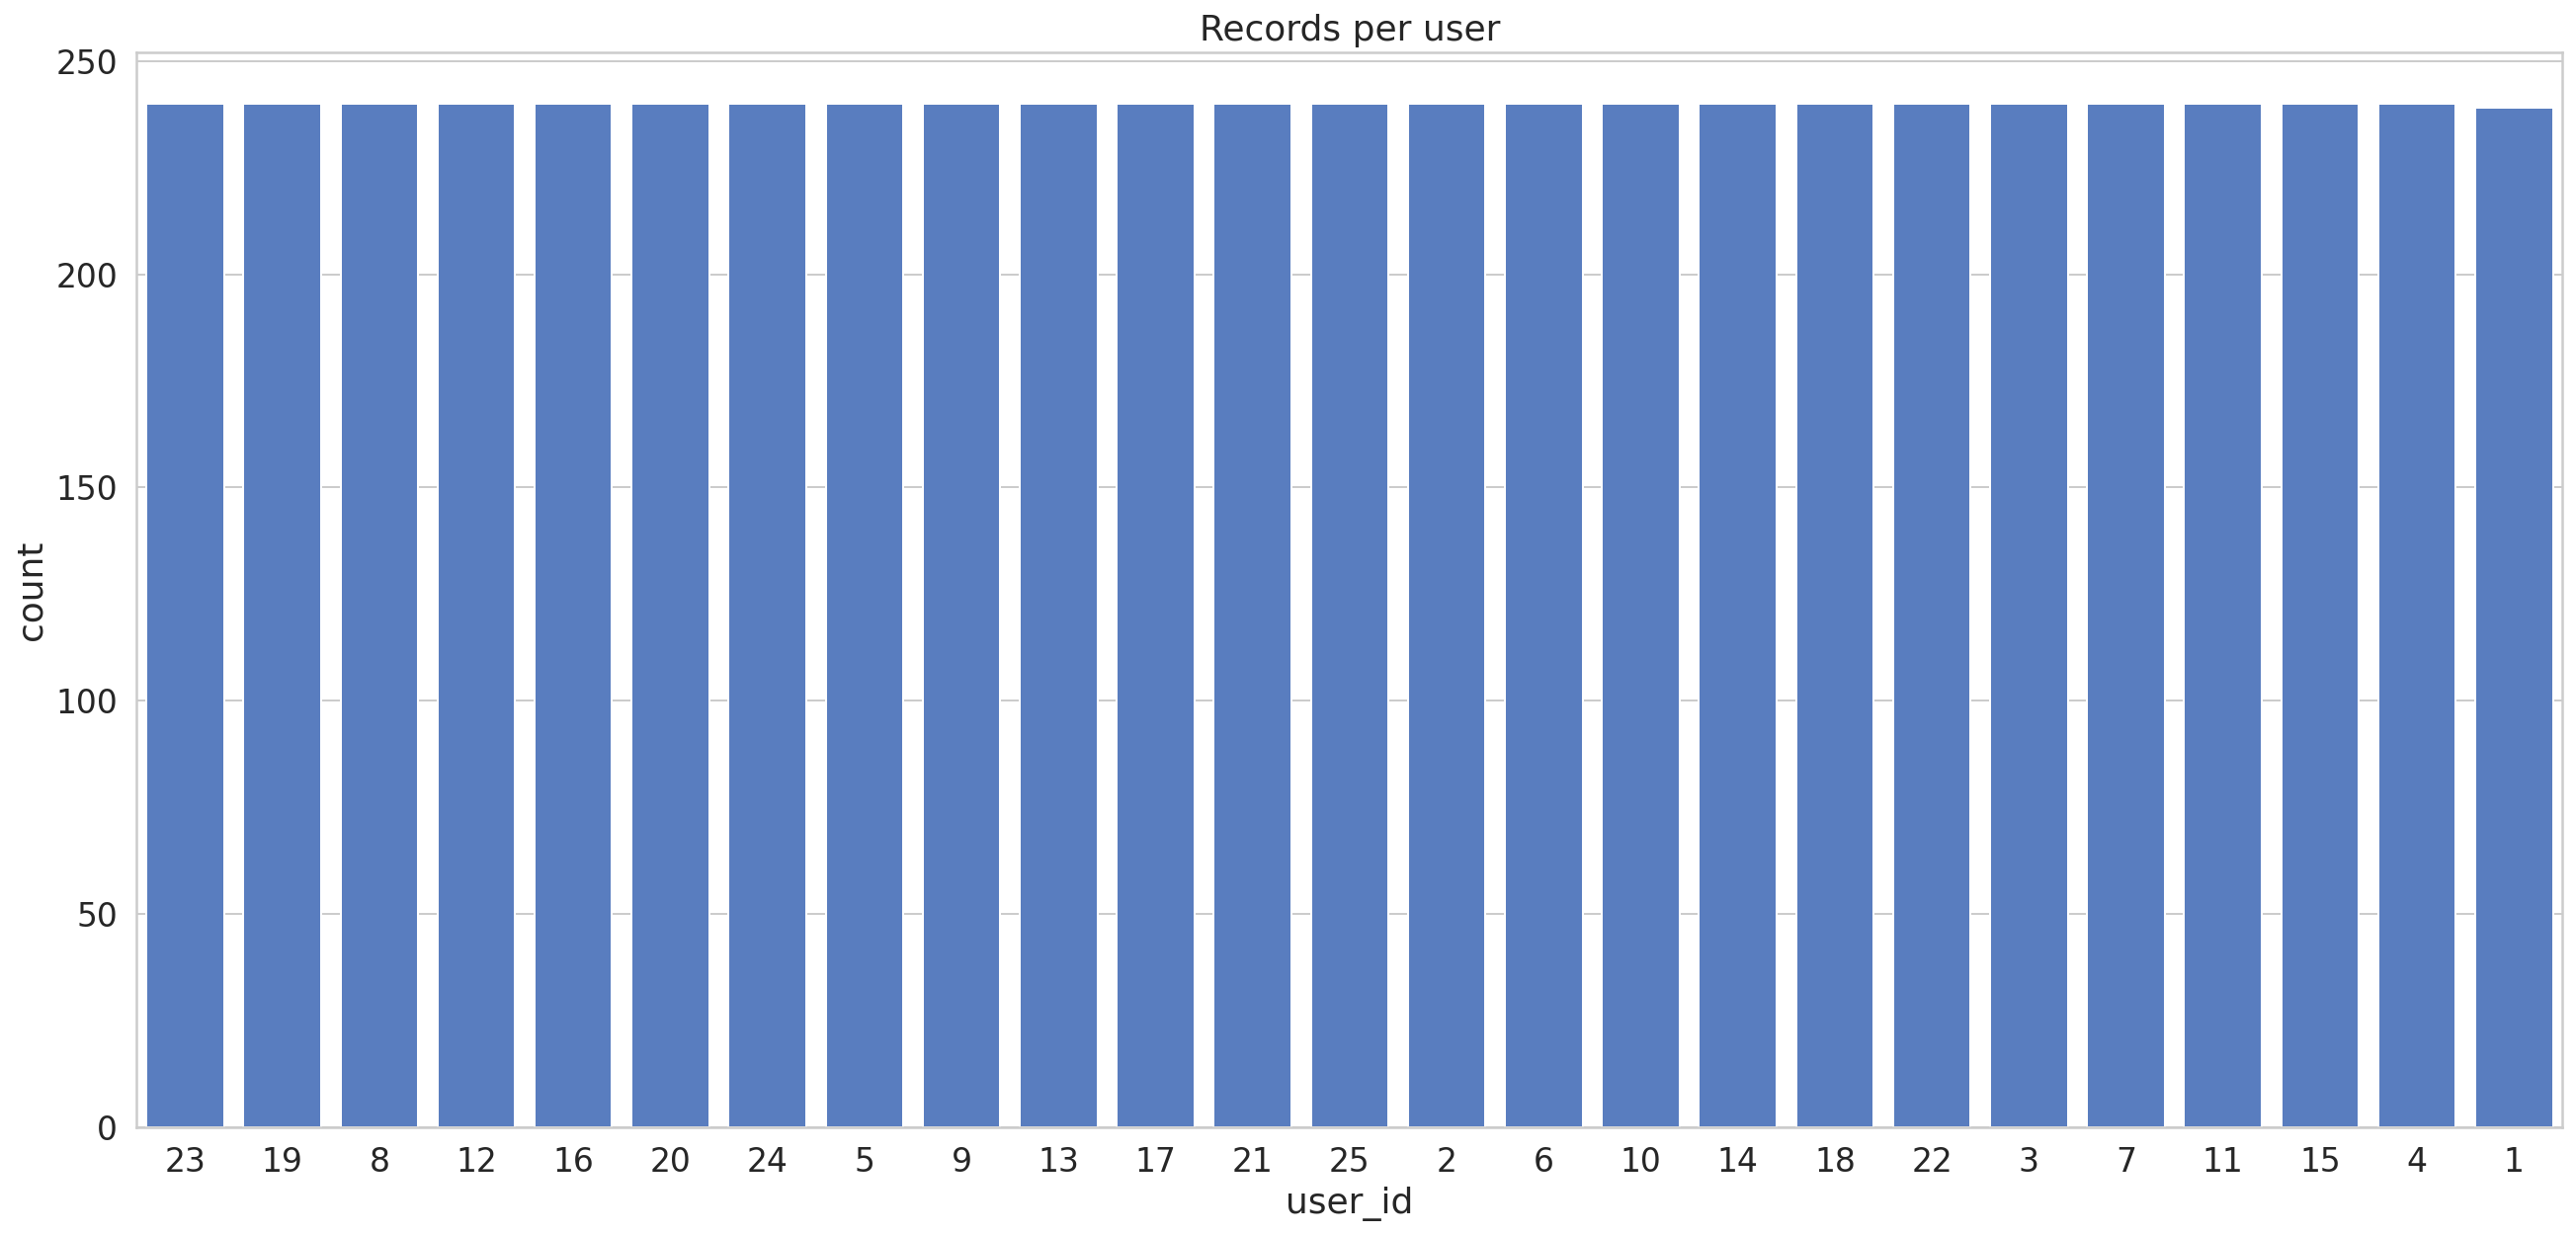

In [ ]:
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per user");

In [ ]:
def plot_song(song, df):
    data = df[df['song'] == song][['x_axis', 'y_axis', 'z_axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=song)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

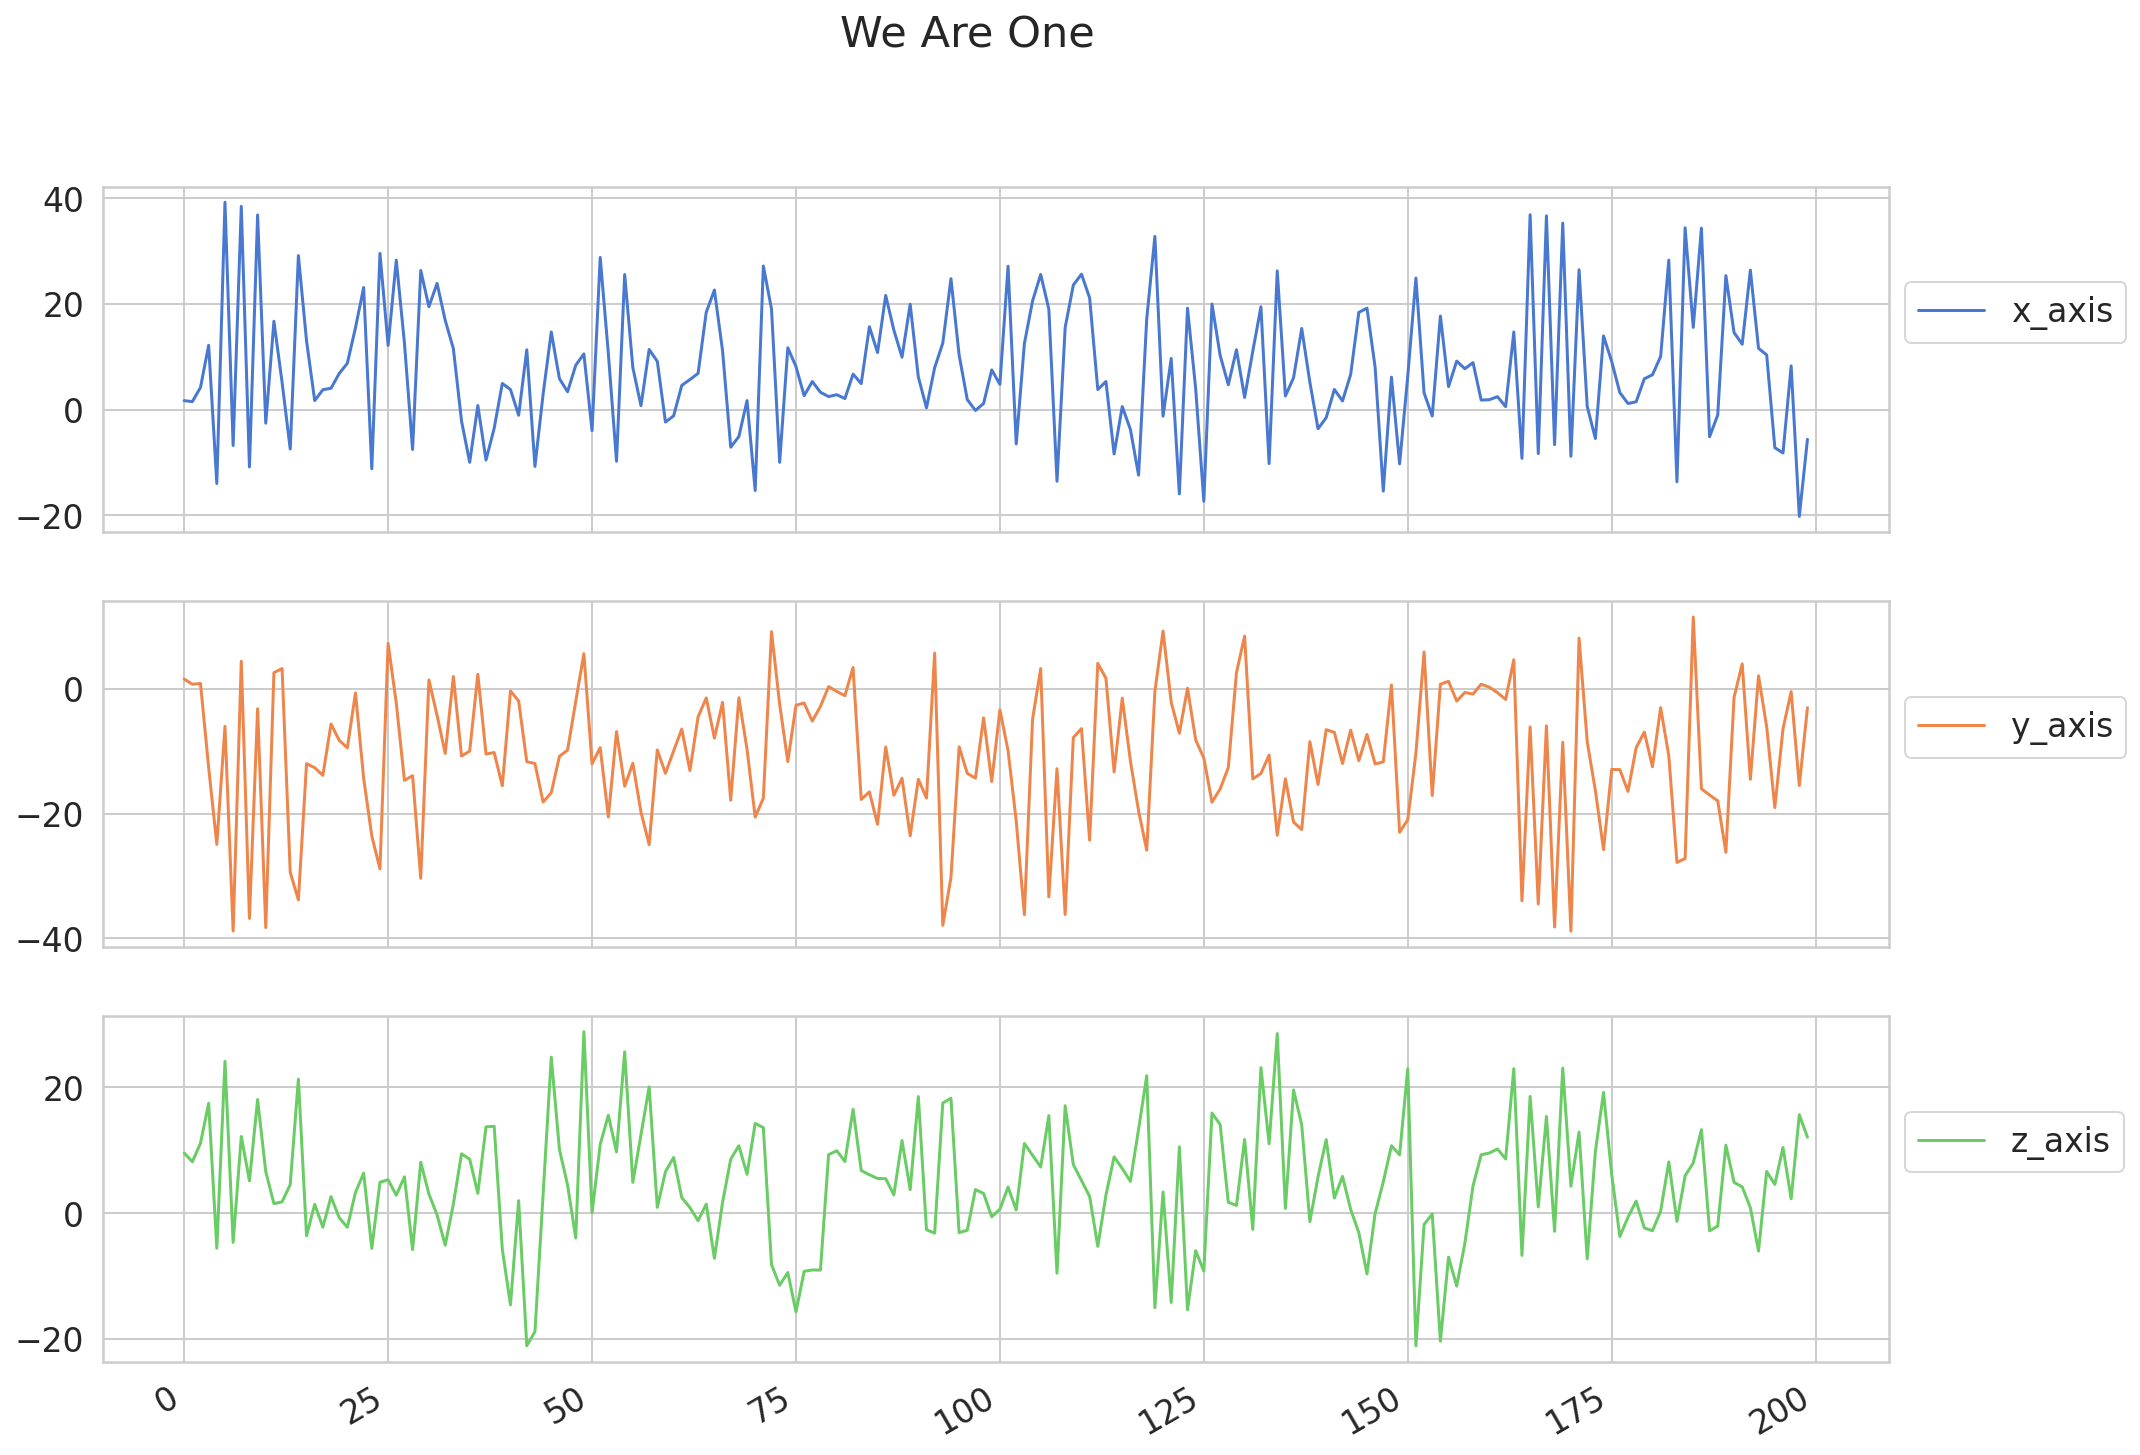

In [ ]:
plot_song("We Are One", df);

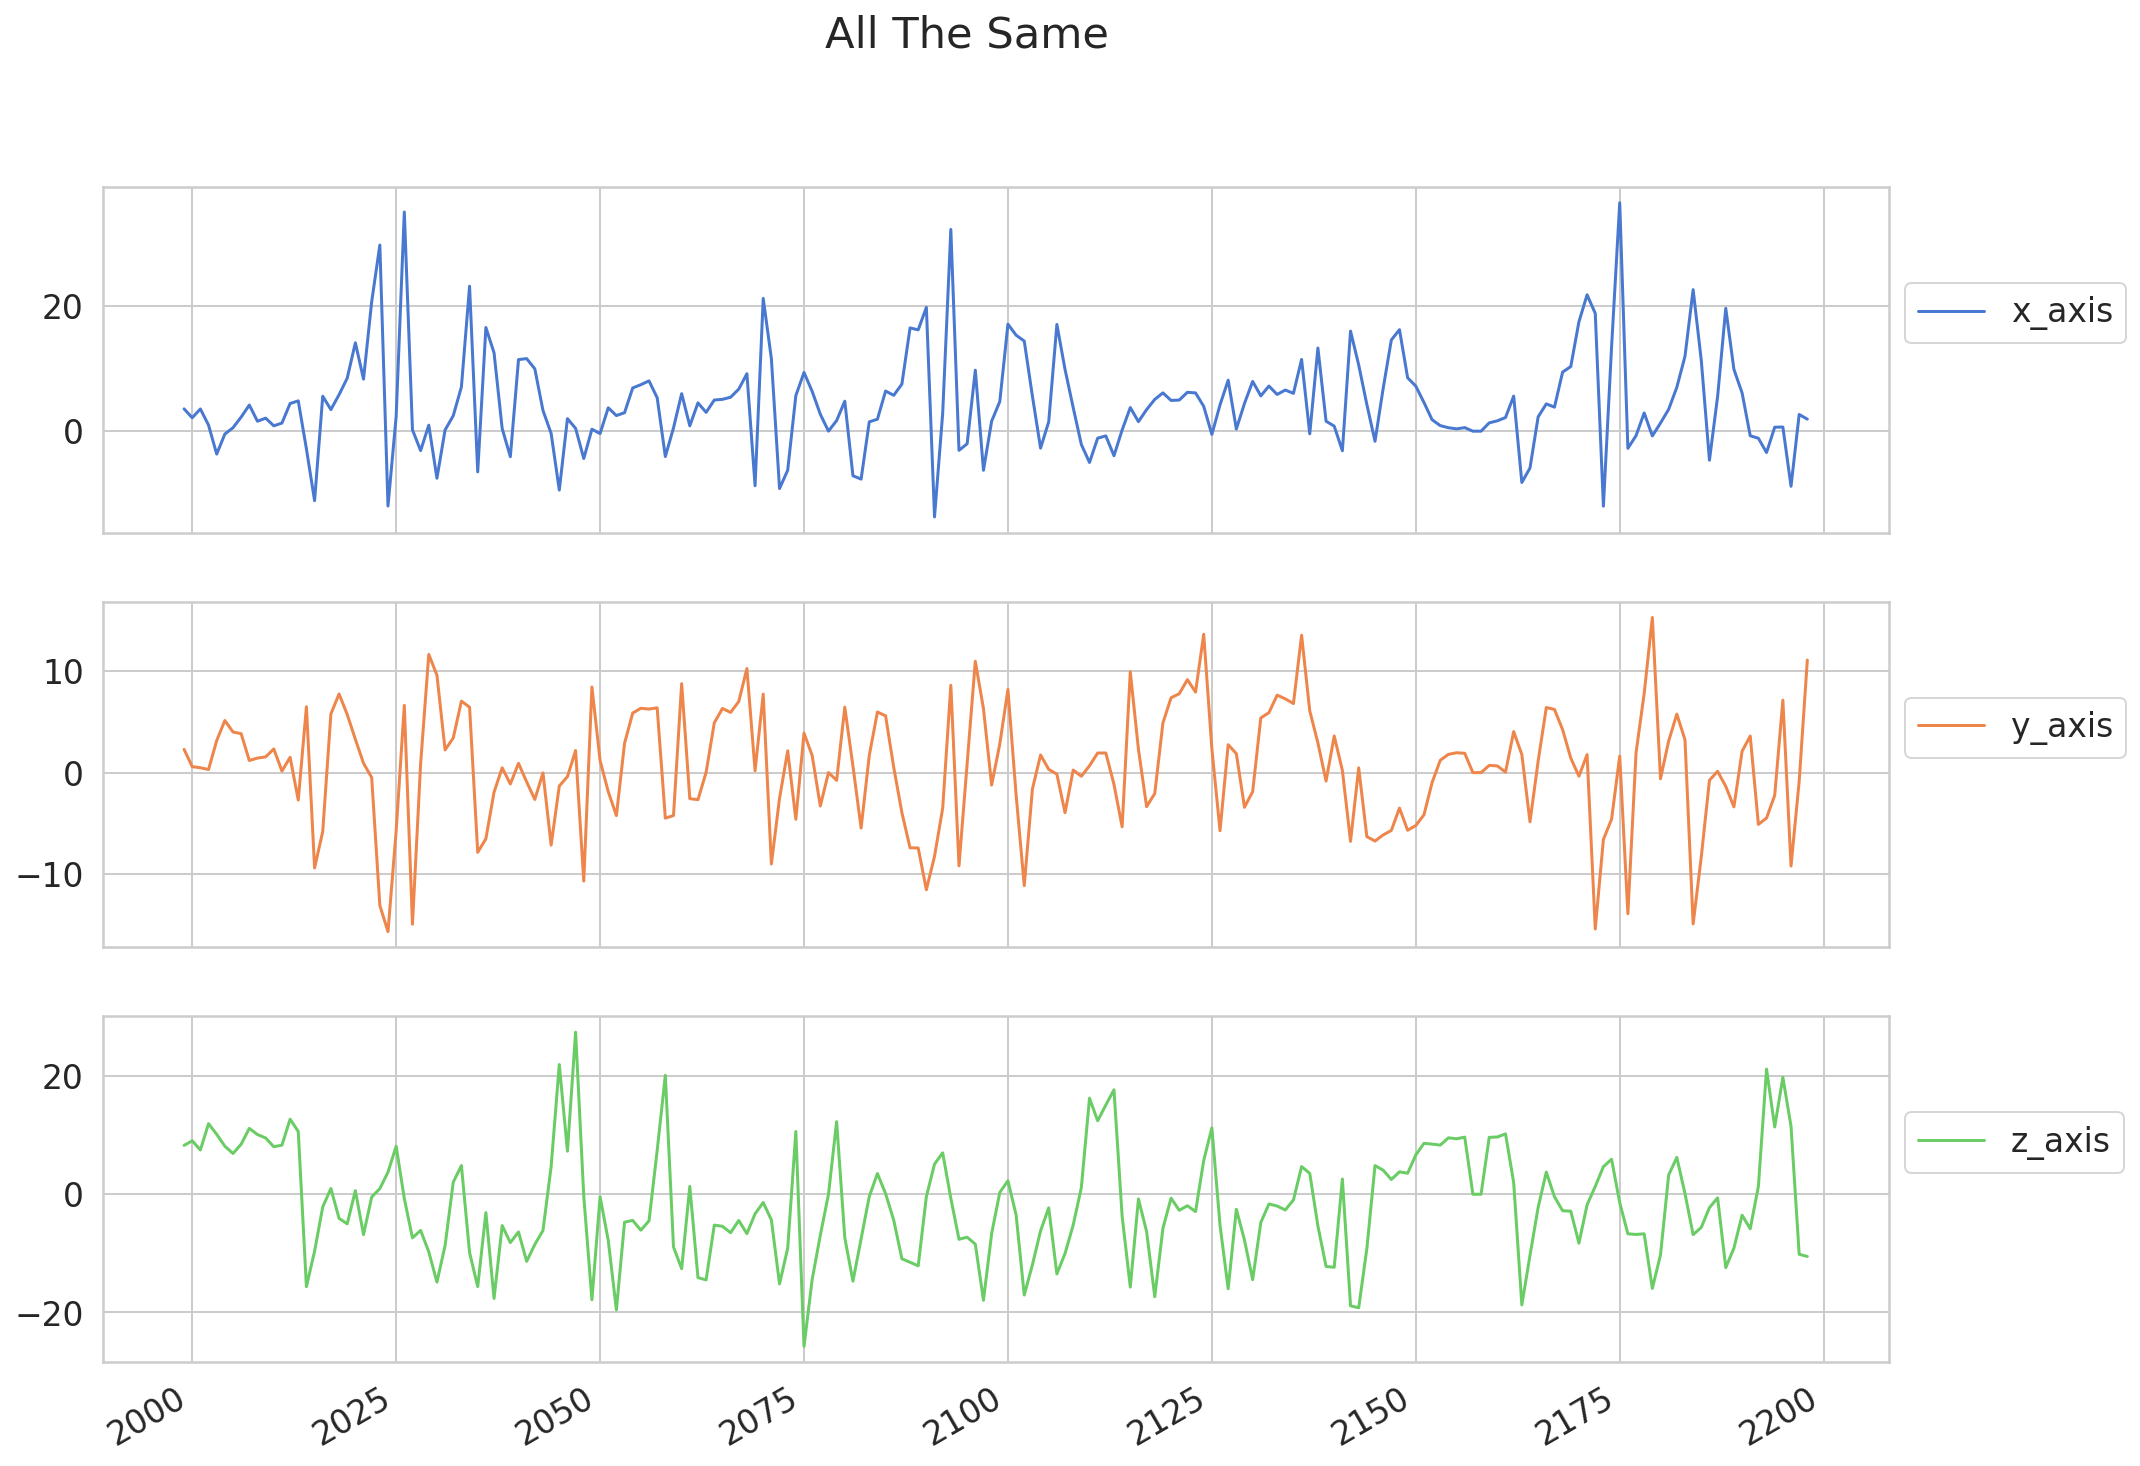

In [ ]:
plot_song("All The Same", df);

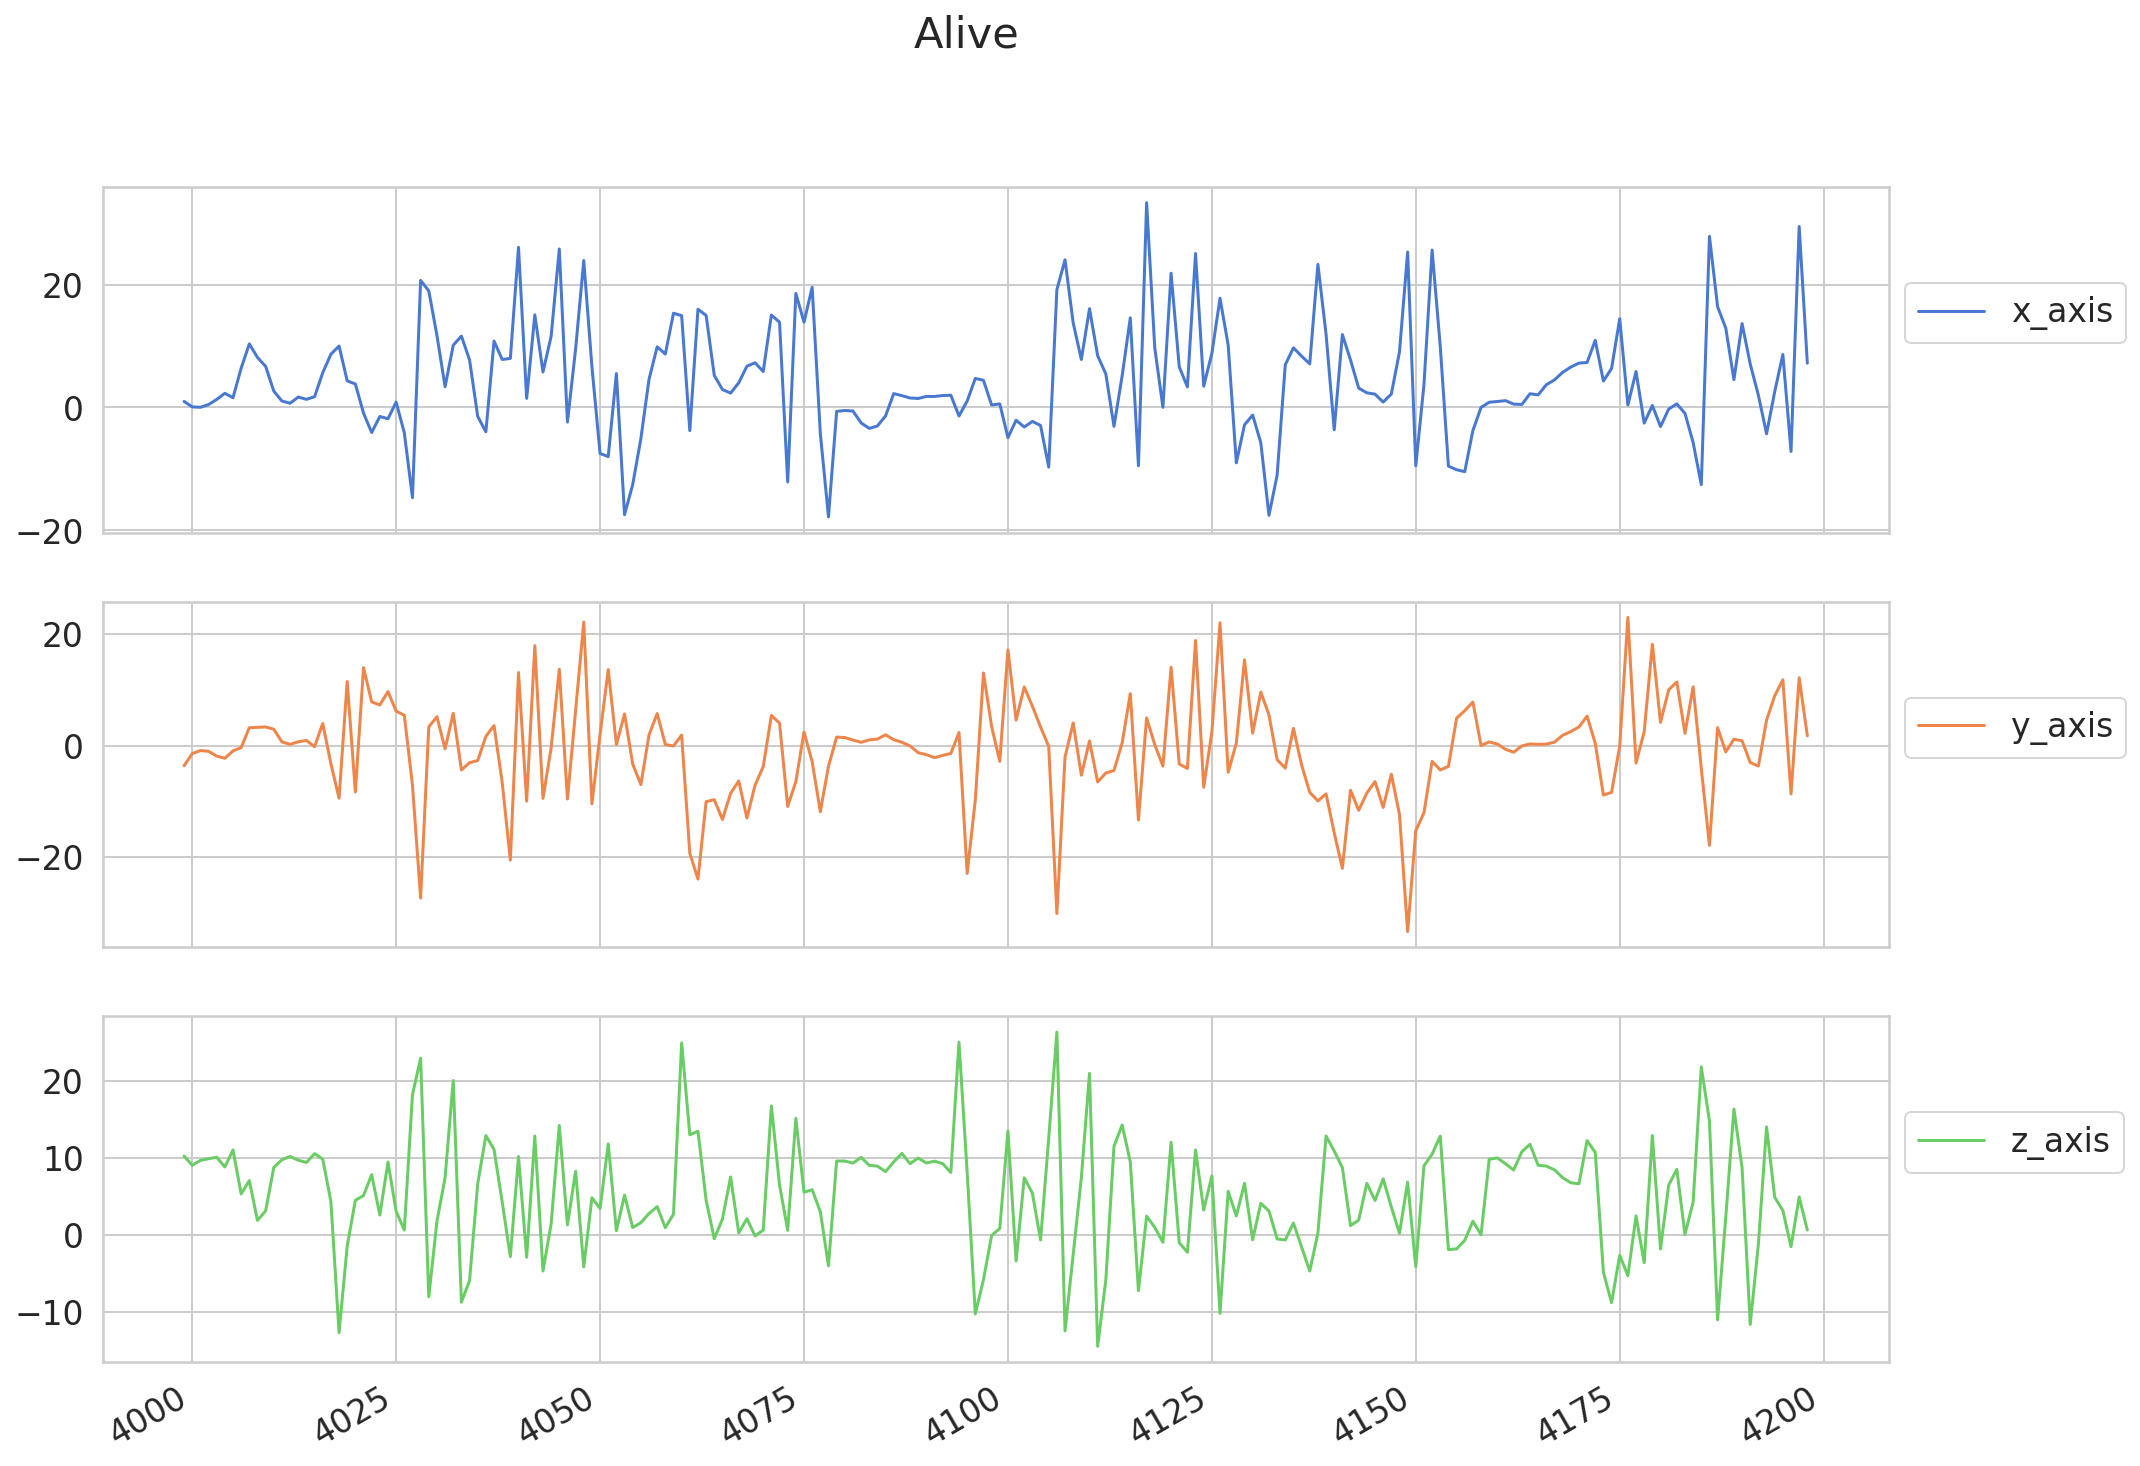

In [ ]:
plot_song("Alive", df);

**Preprocessing**

In [ ]:
df_train = df[df['user_id'] <= 35]
df_test = df[df['user_id'] > 15]

In [ ]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x_axis', 'y_axis', 'z_axis']
print(scale_columns)
print("_________________")
scaler = RobustScaler()
print(df_train[scale_columns])
print("_________________")

scaler = scaler.fit(df_train[scale_columns])
print(scaler)
print("_________________")
df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())
print(df_train.loc[:, scale_columns])
print(df_train)

['x_axis', 'y_axis', 'z_axis']
_________________
         x_axis     y_axis     z_axis
0      1.676498   1.556198   9.570175
1      1.485672   0.736069   8.173523
2      4.177246   0.848480  11.127731
3     12.134964 -12.630280  17.479538
4    -13.989243 -24.938156  -5.588715
...         ...        ...        ...
5994  -7.044159  -7.906159   0.208969
5995 -16.111465   1.552124  -6.830231
5996  -5.030502   5.620239   1.164017
5997  -5.839981   7.061066   8.170761
5998   0.000000   0.000000   0.000000

[5999 rows x 3 columns]
_________________
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
_________________
        x_axis    y_axis    z_axis
0    -0.196813  0.334951  0.568083
1    -0.214084  0.263292  0.456767
2     0.029525  0.273114  0.692225
3     0.749765 -0.904596  1.198481
4    -1.614693 -1.980000 -0.640121
...        ...       ...       ...
5994 -0.986105 -0.491825 -0.178030
5995 -1.806772  0.334595 -0.739073
5996 -0.80385

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    print("x_________________________")
    print(X)
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    
    # print("xs_________________________")
    # print(Xs)
    print("np.array(Xs)_________________________")
    print(np.array(Xs))
    # print(np.array(ys).reshape(-1, 1))
    # print("x_________________________")
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.song, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.song, 
    TIME_STEPS, 
    STEP
)

x_________________________
        x_axis    y_axis    z_axis
0    -0.196813  0.334951  0.568083
1    -0.214084  0.263292  0.456767
2     0.029525  0.273114  0.692225
3     0.749765 -0.904596  1.198481
4    -1.614693 -1.980000 -0.640121
...        ...       ...       ...
5994 -0.986105 -0.491825 -0.178030
5995 -1.806772  0.334595 -0.739073
5996 -0.803853  0.690048 -0.101910
5997 -0.877117  0.815941  0.456546
5998 -0.348550  0.198978 -0.194685

[5999 rows x 3 columns]
np.array(Xs)_________________________
[[[-0.19681309  0.33495144  0.56808342]
  [-0.21408448  0.26329241  0.45676651]
  [ 0.02952542  0.2731144   0.6922248 ]
  ...
  [ 0.39792815  0.15935428 -0.01241341]
  [-2.17753783 -1.15576522  1.05312092]
  [-0.85806974 -0.06522615  0.76854411]]

 [[-0.00686933  0.168339   -1.35841147]
  [-0.44647888  0.02970594 -0.03656161]
  [ 0.67325104 -0.82202697 -1.87645086]
  ...
  [ 0.04318674 -0.11434541 -0.80572717]
  [-0.34855018  0.1989782  -0.19468511]
  [-0.1829239   0.31809128  0.559515

In [ ]:
print(X_train)
print(X_train.shape, y_train.shape)
print(y_train)

[[[-0.19681309  0.33495144  0.56808342]
  [-0.21408448  0.26329241  0.45676651]
  [ 0.02952542  0.2731144   0.6922248 ]
  ...
  [ 0.39792815  0.15935428 -0.01241341]
  [-2.17753783 -1.15576522  1.05312092]
  [-0.85806974 -0.06522615  0.76854411]]

 [[-0.00686933  0.168339   -1.35841147]
  [-0.44647888  0.02970594 -0.03656161]
  [ 0.67325104 -0.82202697 -1.87645086]
  ...
  [ 0.04318674 -0.11434541 -0.80572717]
  [-0.34855018  0.1989782  -0.19468511]
  [-0.1829239   0.31809128  0.55951553]]

 [[-0.09520528  0.16168612  0.59664995]
  [-0.16115721  0.10363548  0.46009637]
  [ 0.25684862  0.49859343  1.12316359]
  ...
  [-0.97177001 -0.9246266   1.57223906]
  [-0.24579747 -1.44242401 -0.62932955]
  [ 1.08590254 -0.76324438 -2.33333295]]

 ...

 [[-0.20649976  0.26903468  0.57475288]
  [-0.21625134  0.22986273  0.56420993]
  [-0.18648838  0.19504247  0.53661633]
  ...
  [ 0.6203003  -1.05833331  0.07545217]
  [ 1.57275221  0.95823489  1.12425084]
  [-0.60864287 -0.40189214 -0.33253999]]

 [

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)
print(y_train)
print("____________")

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)
# print(y_test)

[['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['We Are One']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same']
 ['All The Same'

In [ ]:
print(X_train.shape, y_train.shape)

(145, 200, 3) (145, 3)


**Classifying**

In [ ]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=64,
    validation_split=0.1,
    shuffle=False
)

Train on 130 samples, validate on 15 samples
Epoch 1/2000
130/130 [==============================] - 9s 67ms/sample - loss: 1.0674 - acc: 0.5923 - val_loss: 1.0163 - val_acc: 1.0000
Epoch 2/2000
130/130 [==============================] - 0s 948us/sample - loss: 0.9447 - acc: 0.9385 - val_loss: 0.9250 - val_acc: 1.0000
Epoch 3/2000
130/130 [==============================] - 0s 953us/sample - loss: 0.8048 - acc: 0.9615 - val_loss: 0.8181 - val_acc: 1.0000
Epoch 4/2000
130/130 [==============================] - 0s 797us/sample - loss: 0.6335 - acc: 0.9615 - val_loss: 0.6788 - val_acc: 1.0000
Epoch 5/2000
130/130 [==============================] - 0s 714us/sample - loss: 0.3944 - acc: 0.9538 - val_loss: 0.4721 - val_acc: 1.0000
Epoch 6/2000
130/130 [==============================] - 0s 695us/sample - loss: 0.2305 - acc: 0.9692 - val_loss: 0.1605 - val_acc: 1.0000
Epoch 7/2000
130/130 [==============================] - 0s 644us/sample - loss: 0.1124 - acc: 0.9692 - val_loss: 0.0165 - val_ac

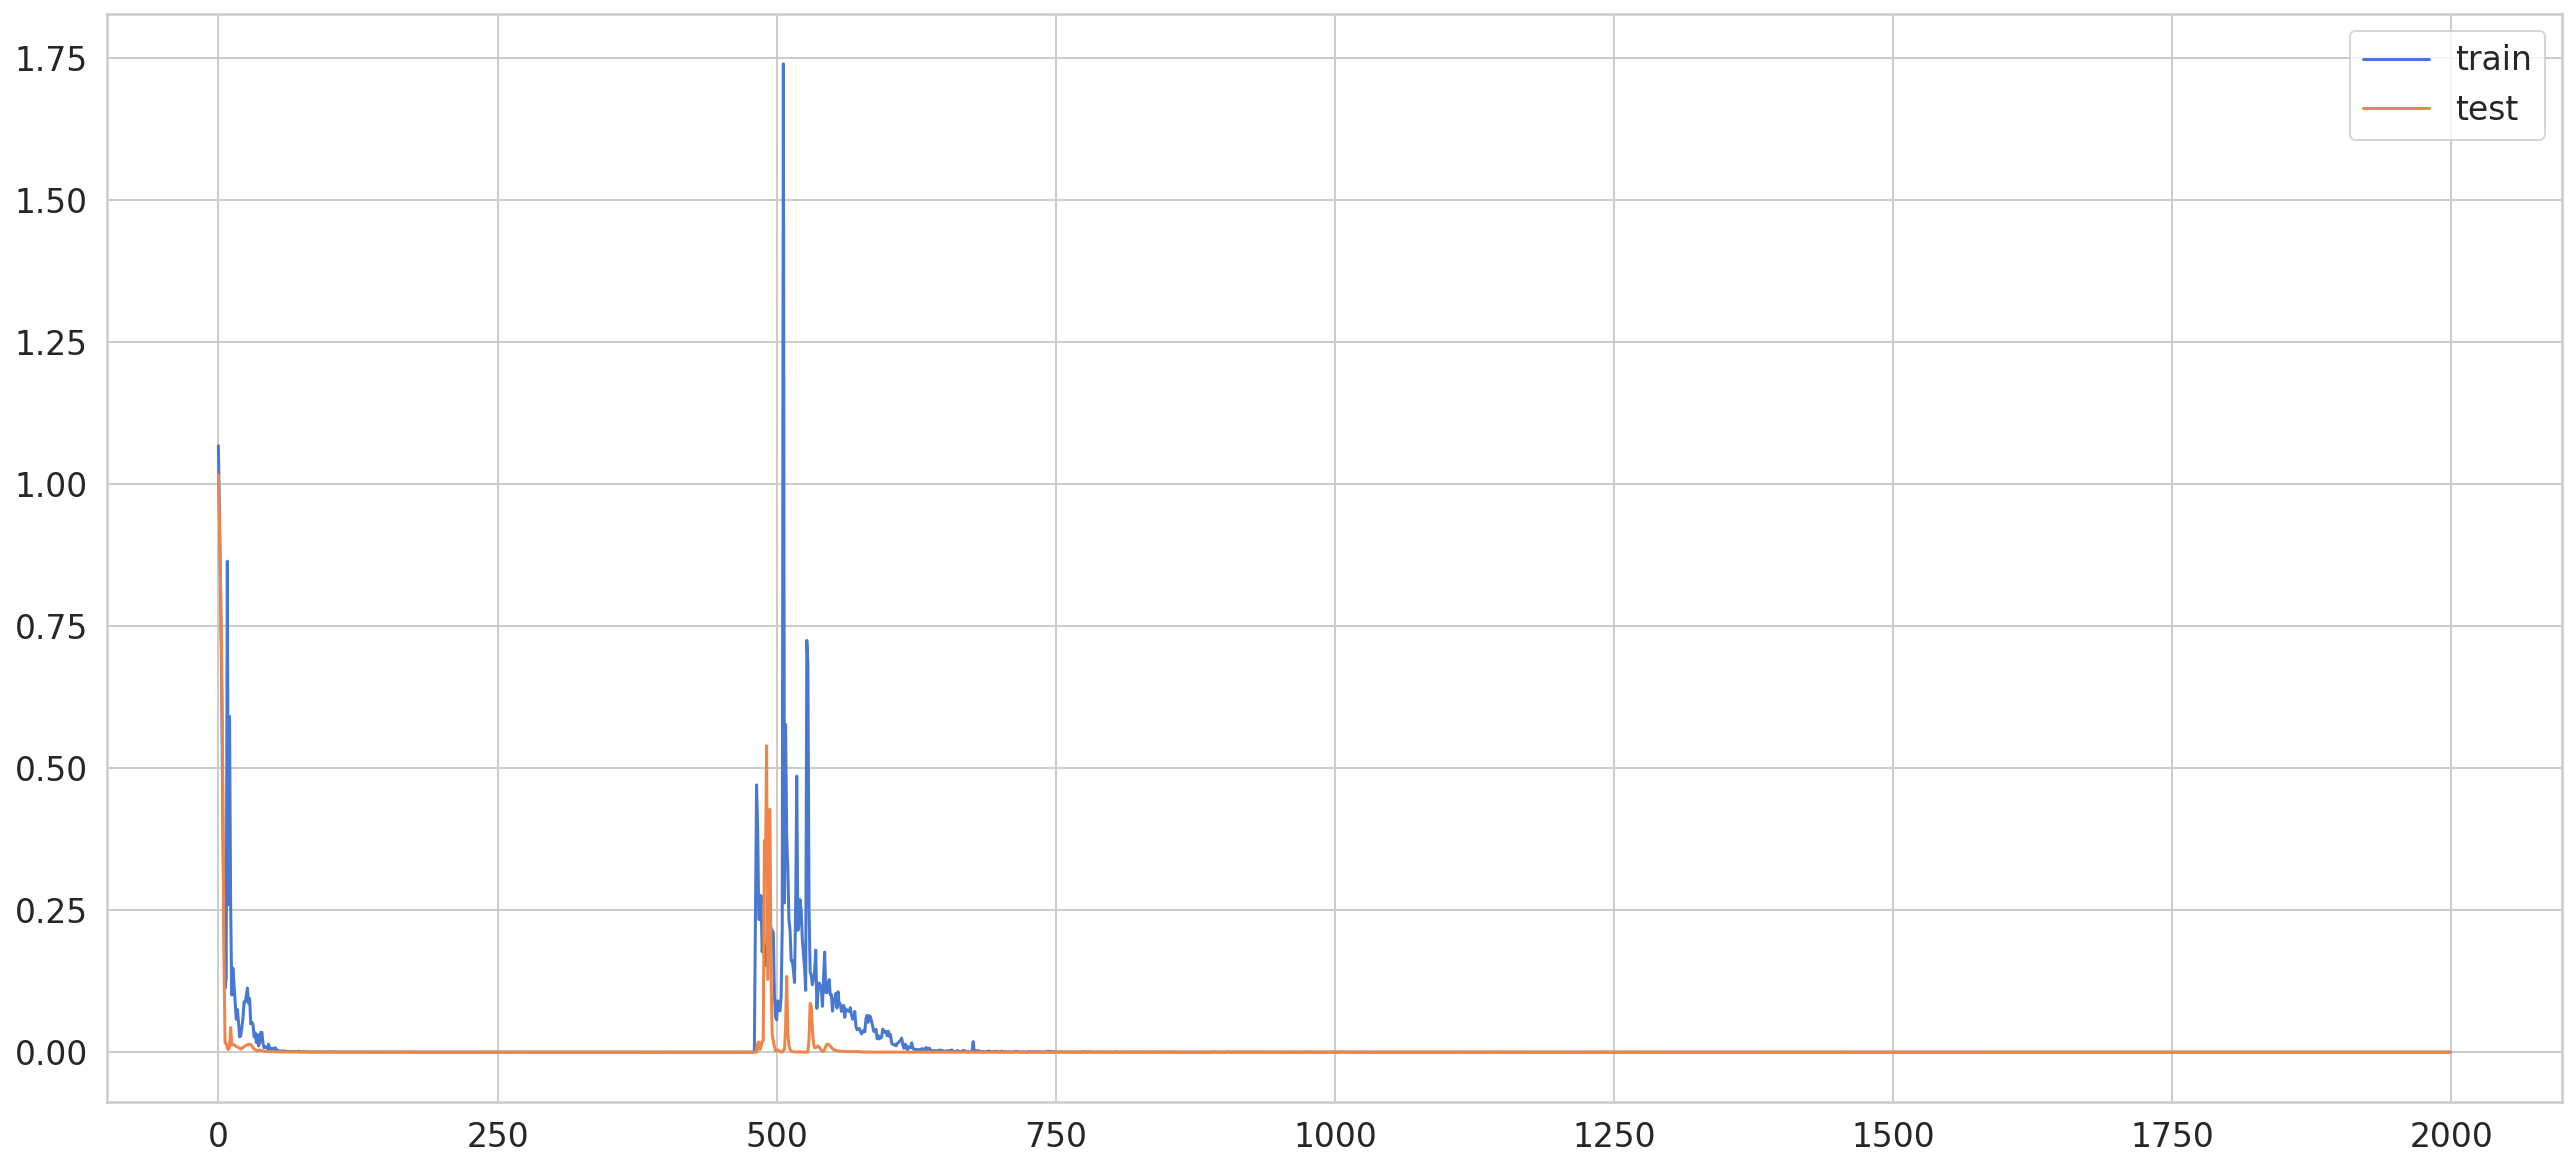

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

**Evaluation**

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

# print(y_test)
# print("__________________________")
print(acc*100)


55/55 [==============================] - 0s 604us/sample - loss: 0.4164 - acc: 0.9455
94.54545378684998


In [ ]:
!ls

drive  sample_data


In [ ]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
y_pred = model.predict(X_test)
print("_________________-")
print(y_pred)

_________________-
[[1.0036662e-09 1.8240480e-09 1.0000000e+00]
 [1.0921157e-09 3.5580205e-09 1.0000000e+00]
 [1.2457280e-09 2.6377243e-09 1.0000000e+00]
 [3.5749859e-09 1.8080495e-08 1.0000000e+00]
 [6.9792294e-10 1.6264005e-09 1.0000000e+00]
 [5.7976829e-10 2.6482398e-09 1.0000000e+00]
 [3.3043118e-08 1.8606816e-08 1.0000000e+00]
 [2.7801741e-09 4.2496624e-09 1.0000000e+00]
 [3.7316958e-10 1.0889519e-09 1.0000000e+00]
 [3.7067252e-10 3.0251002e-09 1.0000000e+00]
 [4.1244227e-10 1.0668413e-09 1.0000000e+00]
 [1.2115533e-12 4.7824028e-07 9.9999952e-01]
 [3.4512346e-10 1.1560106e-09 1.0000000e+00]
 [3.7486760e-09 2.4781501e-08 1.0000000e+00]
 [2.6184706e-09 6.0419123e-09 1.0000000e+00]
 [1.5196080e-09 6.3638819e-09 1.0000000e+00]
 [1.3196072e-09 9.9999881e-01 1.2086364e-06]
 [2.2193655e-08 9.4015825e-01 5.9841804e-02]
 [9.5211750e-09 9.9971586e-01 2.8410135e-04]
 [6.8625516e-10 1.5685726e-03 9.9843138e-01]
 [1.8630429e-08 9.9999988e-01 8.4613369e-08]
 [3.4244128e-08 9.9999988e-01 1.6088

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

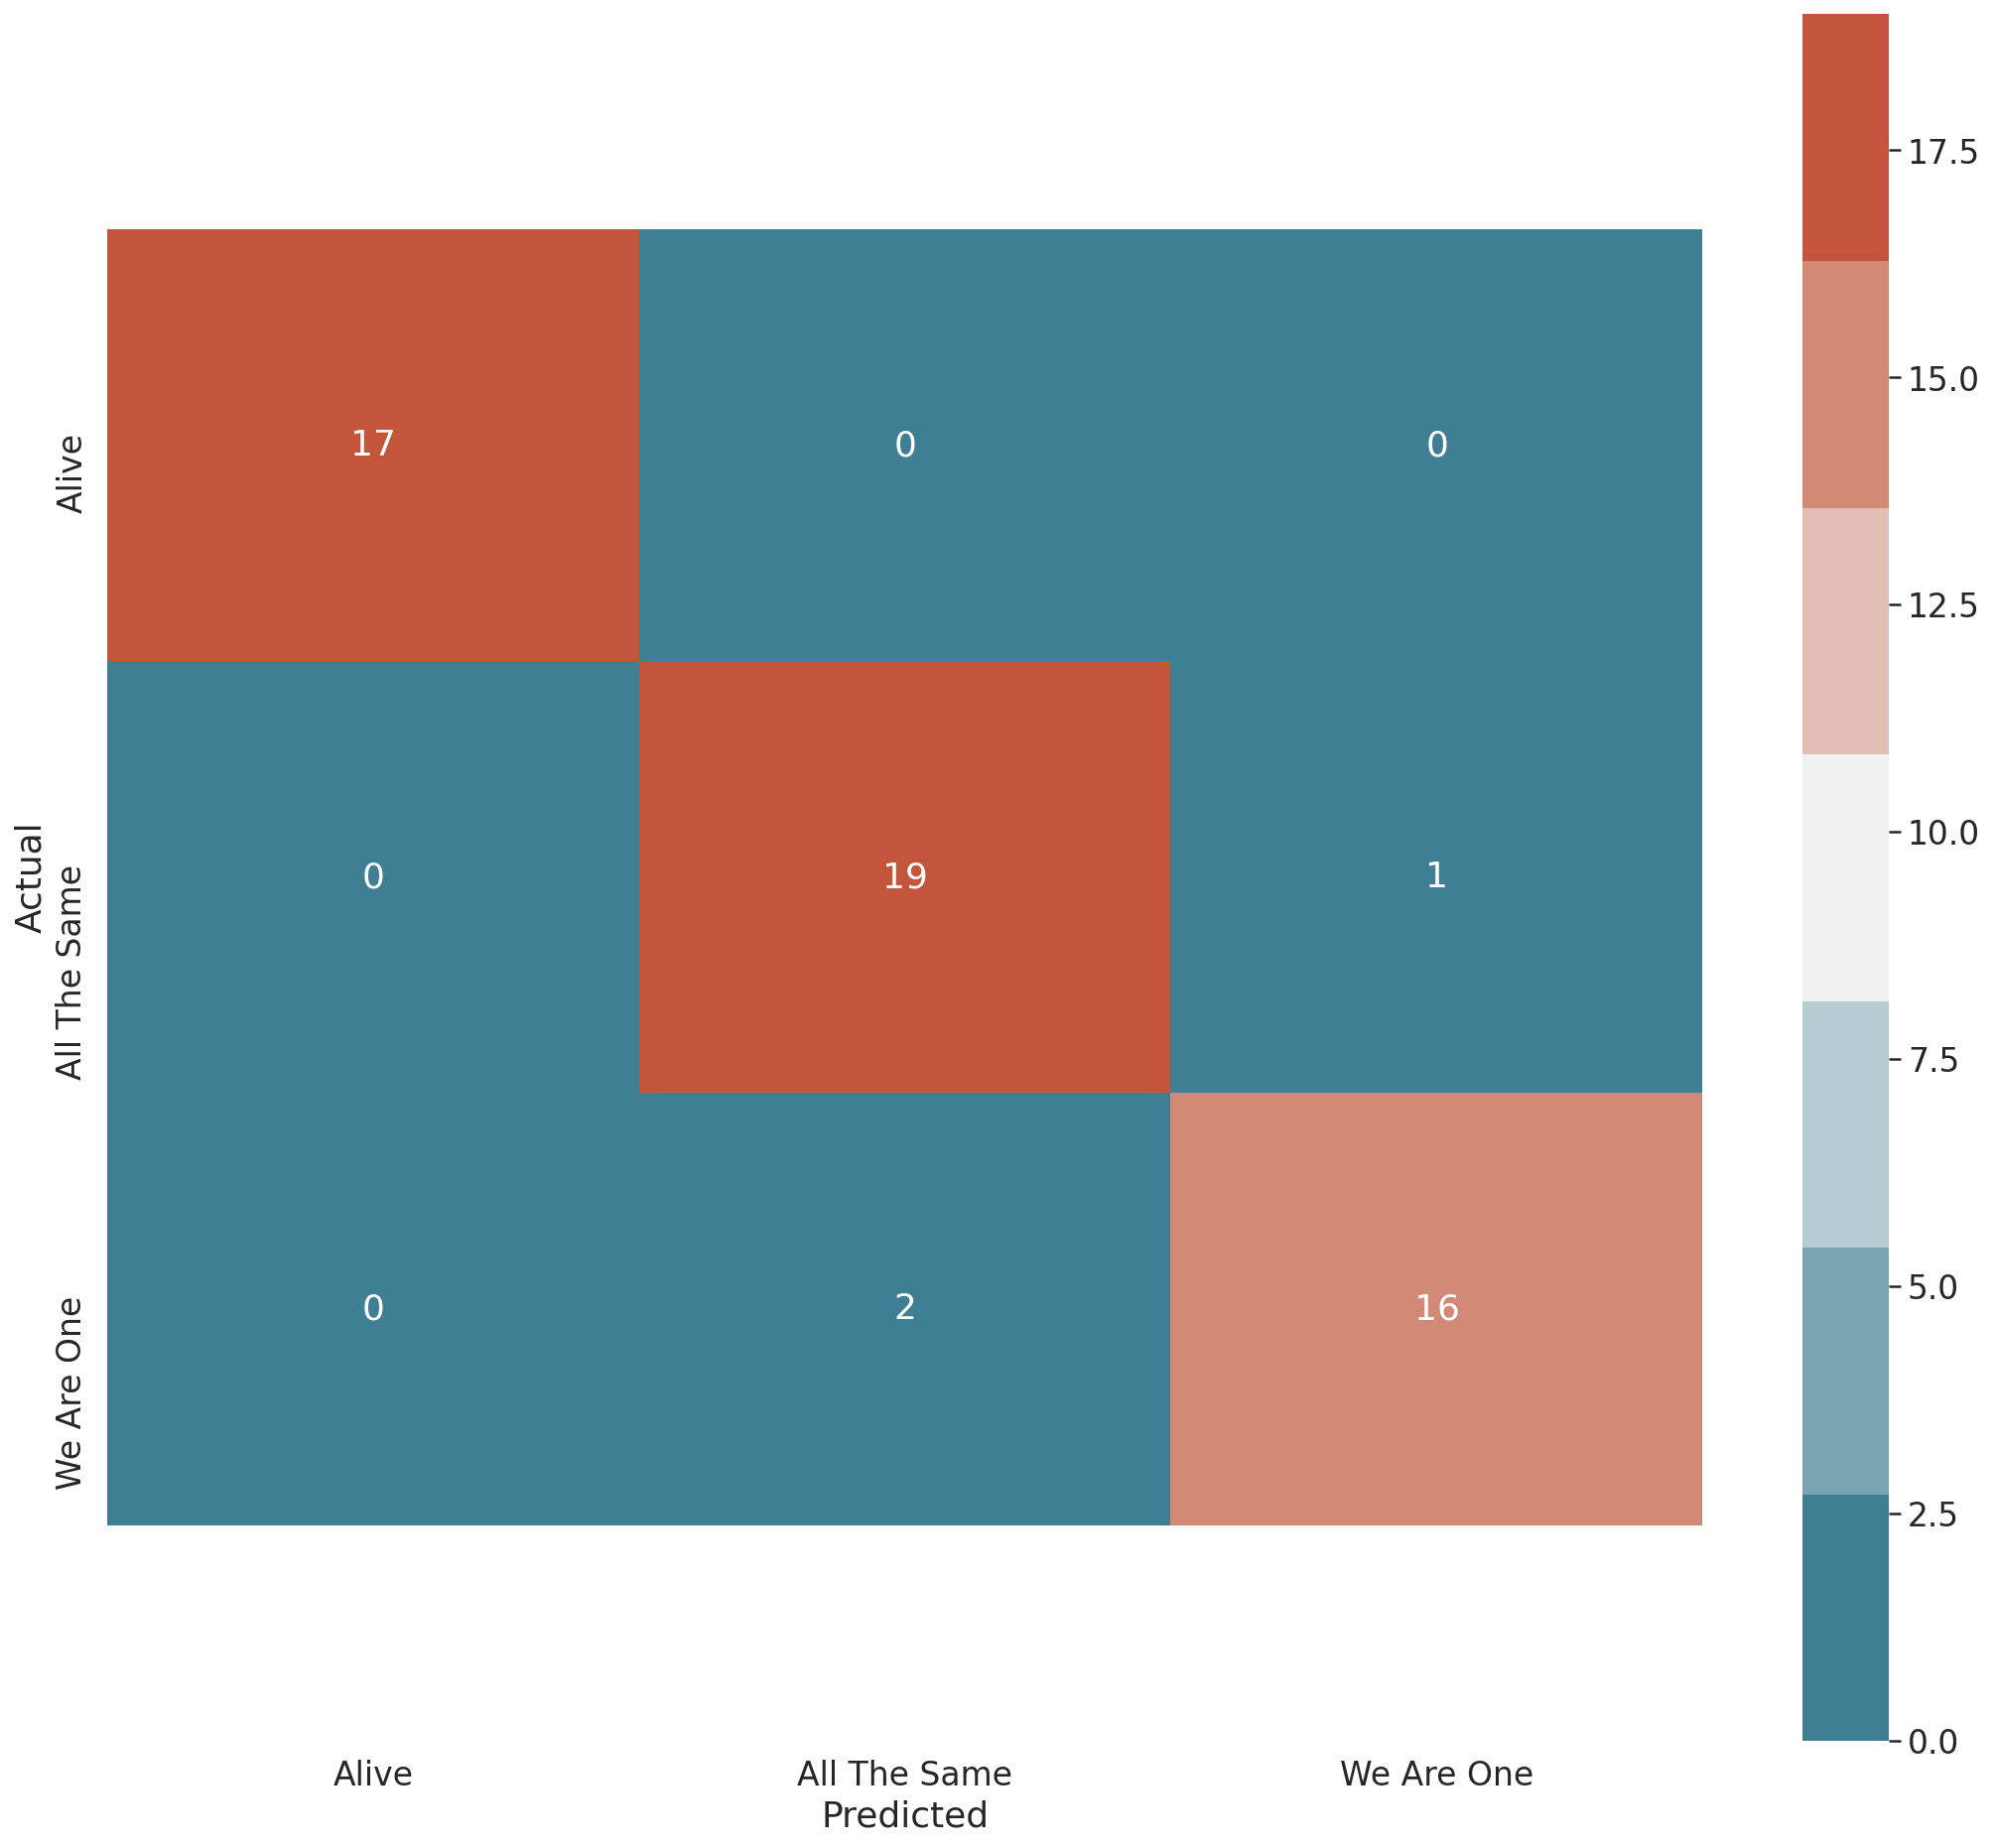

In [ ]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)